# COVID-19 data in Poland

plotting data for Poland based on https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

## Preparation of data
to be run once a day

In [1]:
import pandas as pd
import datetime
#import timeit

pd.show_versions(as_json=False)

def prepare_data(name, url, i=73):
    df = pd.read_csv(url, parse_dates=True)
    df.rename(columns={'Country/Region': 'Region'}, inplace=True)    
    p = df[df.Region == "Poland"].drop(['Region', 'Province/State', 'Lat', 'Long'], axis=1)
    col = p.rename(index=lambda x: name).transpose()
    col.rename(index=lambda i: datetime.datetime.strptime(i, '%m/%d/%y'), inplace = True)
    return col[col.index >= datetime.datetime(2020, 3, 3)]

#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
c = prepare_data("confirmed", "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
d = prepare_data("deaths", "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
r = prepare_data("recovered", "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

p = c.merge(d, left_index = True, right_index = True).merge(r, left_index = True, right_index = True)
np = p.rolling(window=2).apply(lambda x: x[1] - x[0]).rename(columns=lambda x: "new "+x)


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.6.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.1
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 45.2.0.post20200210
Cython           : 0.29.15
pytest           : 5.3.5
hypothesis       : 5.5.4
sphinx           : 2.4.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.7
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.12.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       :

## Playing with data

Parameters:

In [2]:
mean_window_size = 7

Processing based on the parameters:

In [3]:
npm = np.rolling(window=mean_window_size).mean().rename(columns=lambda x:"mean(%i) %s" % (mean_window_size,x))

## Presentation of data

In [4]:
p.merge(np.merge(npm, left_index = True, right_index = True), left_index = True, right_index = True).tail(5)

,confirmed,deaths,recovered,new confirmed,new deaths,new recovered,mean(7) new confirmed,mean(7) new deaths,mean(7) new recovered
2020-03-16,177,4,13,58.0,1.0,13.0,23.000000,0.571429,1.857143
2020-03-17,238,5,13,61.0,1.0,0.0,30.857143,0.714286,1.857143
2020-03-18,251,5,13,13.0,0.0,0.0,31.428571,0.714286,1.857143
2020-03-19,355,5,1,104.0,0.0,-12.0,43.714286,0.571429,0.142857
2020-03-20,425,5,1,70.0,0.0,0.0,51.000000,0.428571,0.142857


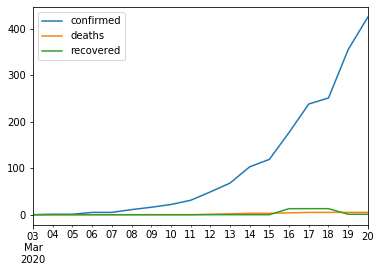

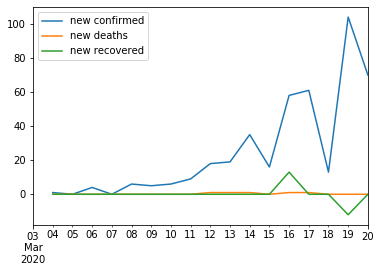

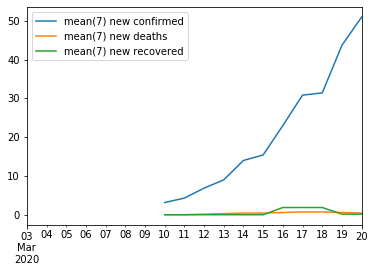

In [5]:
p.plot()
np.plot()
npm.plot()